In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url = "/content/spam.csv"
df = pd.read_csv(url, encoding='latin-1')

In [25]:
print(df.head())
print(df.info())
print(df.describe())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [26]:
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [27]:
print(df.isnull().sum())

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [28]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [29]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [30]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def text_preprocessing(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [32]:
df['message'] = df['message'].apply(text_preprocessing)

In [33]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['message']).toarray()

In [34]:
y = df['label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.85%


In [39]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {cm}')

Confusion Matrix:
 [[965   0]
 [ 24 126]]


In [40]:
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



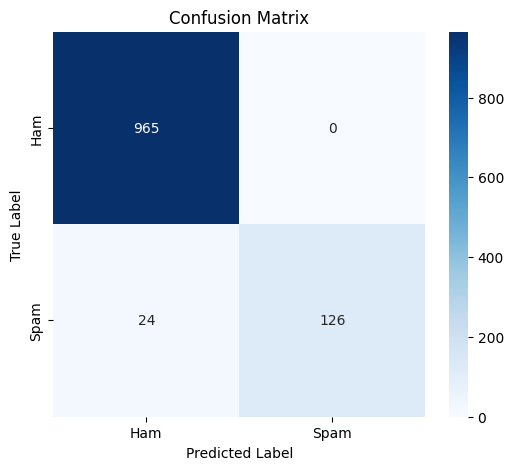

In [41]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()